# Erick Chacon

## What tempo range has the highest danceability score?

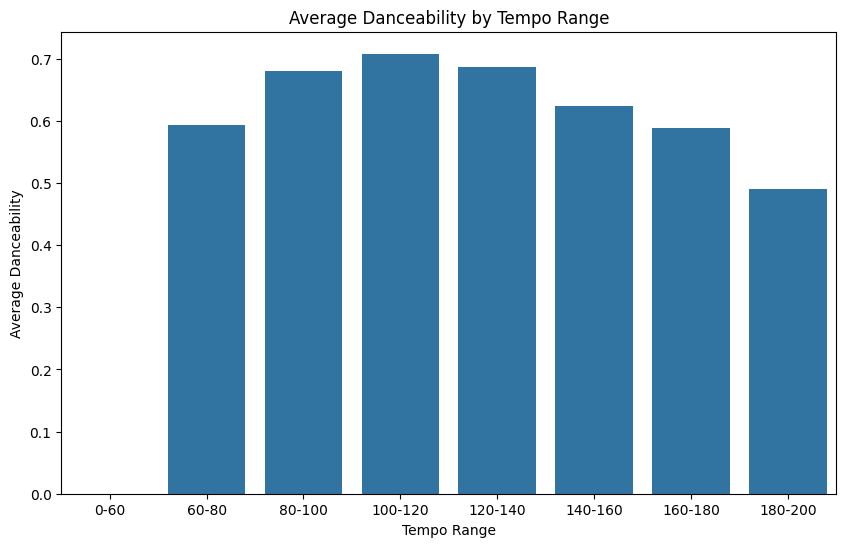

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'songs_normalize.csv'
df = pd.read_csv(file_path)

# Analyze tempo and danceability
df.loc[:, 'tempo_range'] = pd.cut(df['tempo'], bins=[0, 60, 80, 100, 120, 140, 160, 180, 200], labels=['0-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200'])
avg_danceability = df.groupby('tempo_range', observed=True)['danceability'].mean().reset_index()

# Plot the result using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='tempo_range', y='danceability', data=avg_danceability)
plt.title('Average Danceability by Tempo Range')
plt.xlabel('Tempo Range')
plt.ylabel('Average Danceability')
plt.show()


## Who are the top 5 artists, and what is their most popular song?

In [ ]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = 'songs_normalize.csv'  # Replace with the correct path to your file
df = pd.read_csv(file_path)

# Ensure uniqueness of artist-song combinations
df_unique = df.drop_duplicates(subset=['artist', 'song'])

# Calculate the average popularity of each artist
artist_popularity = df_unique.groupby('artist')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False)

# Get top 5 artists
top_5_artists = artist_popularity.head(5)['artist'].tolist()

# Find the most popular song for each of the top 5 artists
top_5_songs = df_unique[df_unique['artist'].isin(top_5_artists)].sort_values(by=['artist', 'popularity'], ascending=[True, False]).drop_duplicates('artist')

# Sort the top 5 songs DataFrame by popularity to ensure the graph is ordered correctly
top_5_songs = top_5_songs.sort_values(by='popularity', ascending=False)

# Ensure the artist column is treated as a categorical type with the correct order
top_5_songs['artist'] = pd.Categorical(top_5_songs['artist'], categories=top_5_songs['artist'], ordered=True)

# Plot the result using Plotly for interactivity
fig = px.bar(
    top_5_songs,
    x='popularity',
    y='artist',
    color='song',
    title='Top 5 Artists and Their Most Popular Song',
    labels={'popularity': 'Popularity', 'artist': 'Artist', 'song': 'Song'},
    category_orders={'artist': top_5_songs['artist'].tolist()}  # Ensure artists are sorted by popularity
)
fig.show()



## What is the relationship between tempo and popularity?

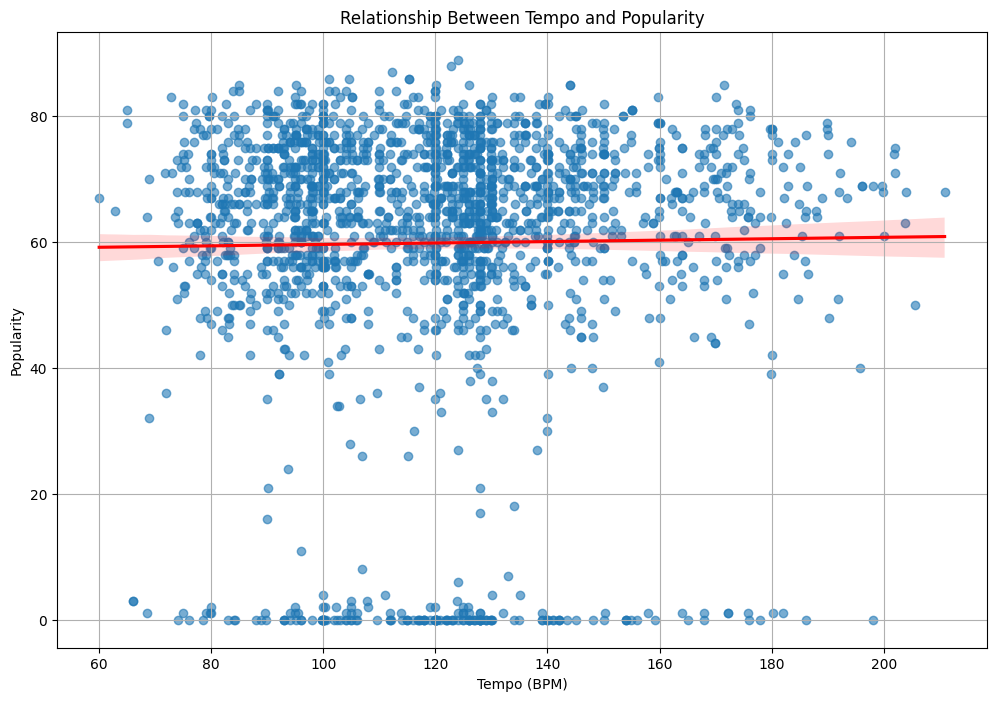

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data
file_path = 'songs_normalize.csv'
df = pd.read_csv(file_path)

# Plot the relationship between tempo and popularity using Seaborn
plt.figure(figsize=(12, 8))
sns.regplot(x='tempo', y='popularity', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Tempo and Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Plot the relationship between tempo and popularity using Plotly Express
fig = px.scatter(df, x='tempo', y='popularity', trendline='ols', title='Relationship Between Tempo and Popularity', labels={'tempo': 'Tempo (BPM)', 'popularity': 'Popularity'})
fig.show()


# Mariyah


## In which year between 2000 and 2019 were the most songs published that start with the letter "I"?





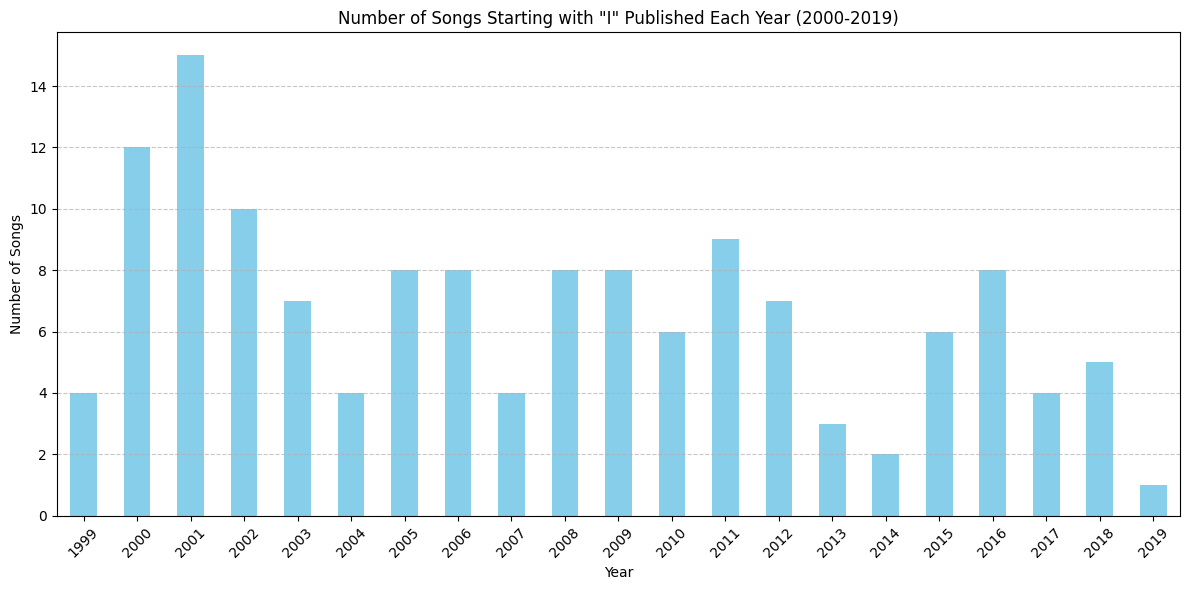

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('songs_normalize.csv')

# Filter songs that start with 'I'
df_filtered = df[df['song'].str.startswith('I')]

# Count the number of songs per year
song_counts = df_filtered['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
song_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs Starting with "I" Published Each Year (2000-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In this analysis, I used Python's matplotlib library to create a bar chart that illustrates the number of songs published each year that start with the letter "I." The data was sourced from a CSV file containing information on various attributes such as artist, song title, duration, explicit content, year, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. The chart reveals that 2002 had the highest number of such songs, followed by 2000. Interestingly, the data shows a decline in the number of songs starting with "I" in more recent years. This trend could be attributed to factors such as shifts in popular music trends or changes in songwriting practices that may favor different themes or letter choices in titles.



## Does a longer track duration correlate with an increase or decrease in overall popularity?

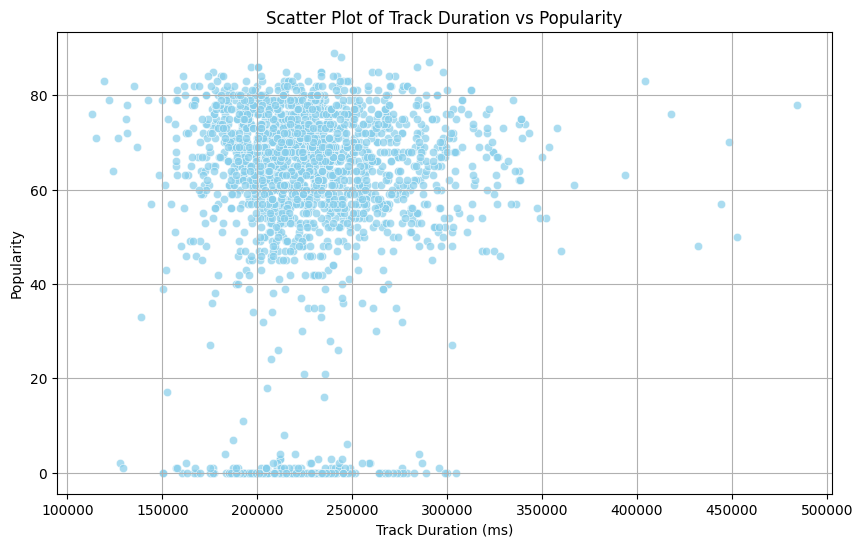

Correlation Coefficient: 0.05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('songs_normalize.csv')

# Ensure relevant columns are present and handle any missing values
df = df[['duration_ms', 'popularity']].dropna()

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_ms', y='popularity', color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Track Duration vs Popularity')
plt.xlabel('Track Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df['duration_ms'].corr(df['popularity'])
print(f'Correlation Coefficient: {correlation:.2f}')


In this analysis, I investigated whether a longer track duration correlates with an increase or decrease in overall popularity. Using Python's matplotlib and seaborn libraries, I created a scatter plot to visualize the relationship between track duration and popularity. The data was sourced from a CSV file containing various attributes such as artist, song title, duration, explicit content, year, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre.

The scatter plot reveals that tracks with durations between 150,000 and 300,000 milliseconds (approximately 2.5 to 5 minutes) tend to have the highest popularity. This finding suggests that there may be an optimal track length that resonates more with listeners, possibly due to fitting well within typical radio playtime or listener attention spans. This trend indicates that while extremely short or excessively long tracks might struggle to gain high popularity, tracks within this duration range are more likely to be well-received by audiences.

## Does an increase in loudness correlate with an increase in energy?

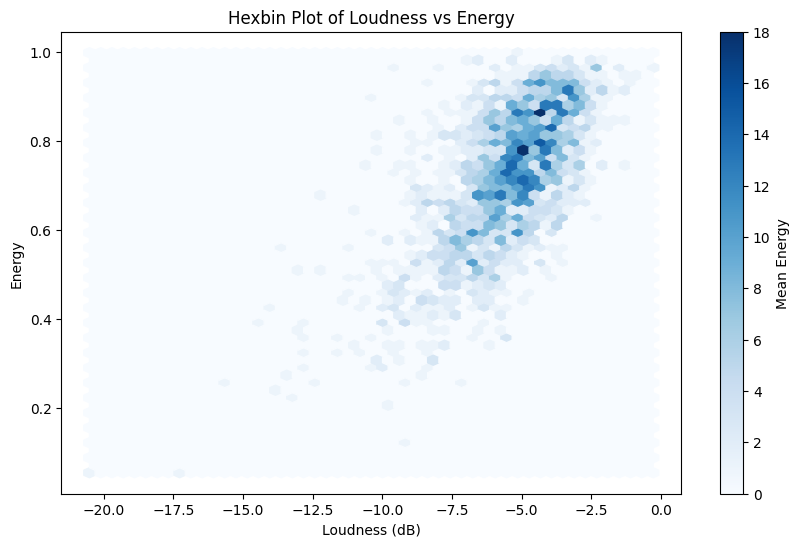

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('songs_normalize.csv')

# Ensure relevant columns are present and handle any missing values
df = df[['loudness', 'energy']].dropna()

# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['loudness'], df['energy'], gridsize=50, cmap='Blues', reduce_C_function='mean')
plt.colorbar(label='Mean Energy')
plt.title('Hexbin Plot of Loudness vs Energy')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.show()


In this analysis, I explored whether an increase in loudness correlates with an increase in energy. Using Python's matplotlib library, I created a hexbin plot to visualize the relationship between loudness and energy. The data was sourced from a CSV file containing various attributes such as artist, song title, duration, explicit content, year, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre.

The hexbin plot shows a positive correlation between loudness and energy, indicating that as loudness increases, energy tends to increase as well. Specifically, the highest energy levels can be seen within the loudness range of -7.5 to -5.0 dB. This suggests that tracks within this loudness range are perceived as more energetic by listeners. This trend could be attributed to production techniques where more energetic tracks are mixed to be louder to enhance their impact and presence. The correlation implies that music producers might be intentionally increasing loudness to match the high energy levels of the tracks, thereby creating a more engaging listening experience.

# Ibrahim

## Which artist has the most dancebale songs?

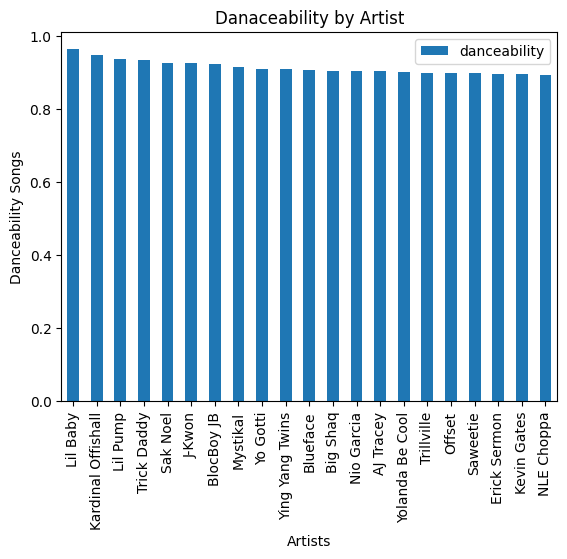

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import csv
song_data = pd.read_csv('songs_normalize.csv')

# Which artist has the most danceable songs
songs_and_artist = song_data[['artist', 'danceability']].groupby('artist').mean().sort_values(by=['danceability'], ascending=False)
songs_and_artist = songs_and_artist[songs_and_artist['danceability'] >= .894]
most_danceable_artist_chart = songs_and_artist.plot(kind='bar', title='Danaceability by Artist')
plt.ylabel('Danceability Songs')
plt.xlabel('Artists')
plt.show()

## What are the most energetic songs that score high on acousticness?

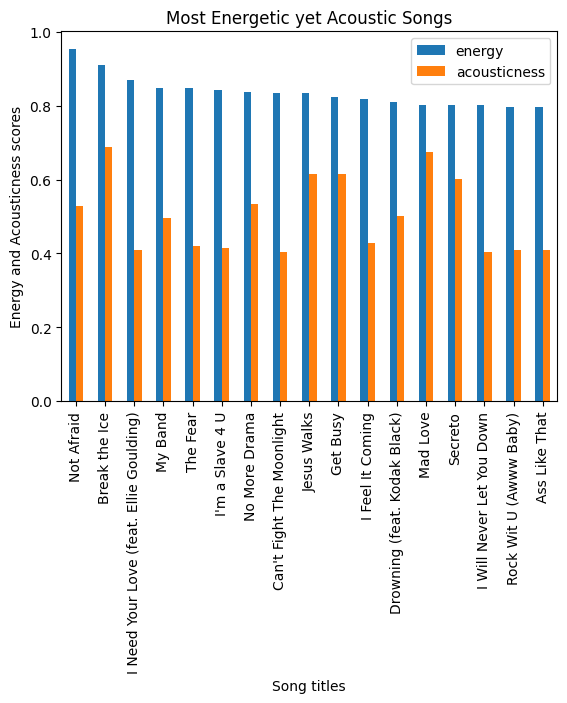

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import csv
song_data = pd.read_csv('songs_normalize.csv')

# What are the most energetic songs that score high on acousticness

eng_and_acou = song_data[['song', 'energy', 'acousticness']]
eng_and_acou = eng_and_acou[eng_and_acou['energy'] >= .79]
eng_and_acou = eng_and_acou[eng_and_acou['acousticness'] >= .4]
eng_and_acou = eng_and_acou.sort_values(by='energy', ascending=False).reset_index()
eng_and_acou = eng_and_acou.drop('index', axis='columns')
eng_and_acou2 = eng_and_acou.set_index('song', inplace=True)
most_energetic_and_acoustic = eng_and_acou.plot(kind='bar', title='Most Energetic yet Acoustic Songs')
plt.xticks(rotation=90)
plt.ylabel('Energy and Acousticness scores')
plt.xlabel('Song titles')
plt.show()

## What is the lowest Valence track by year?

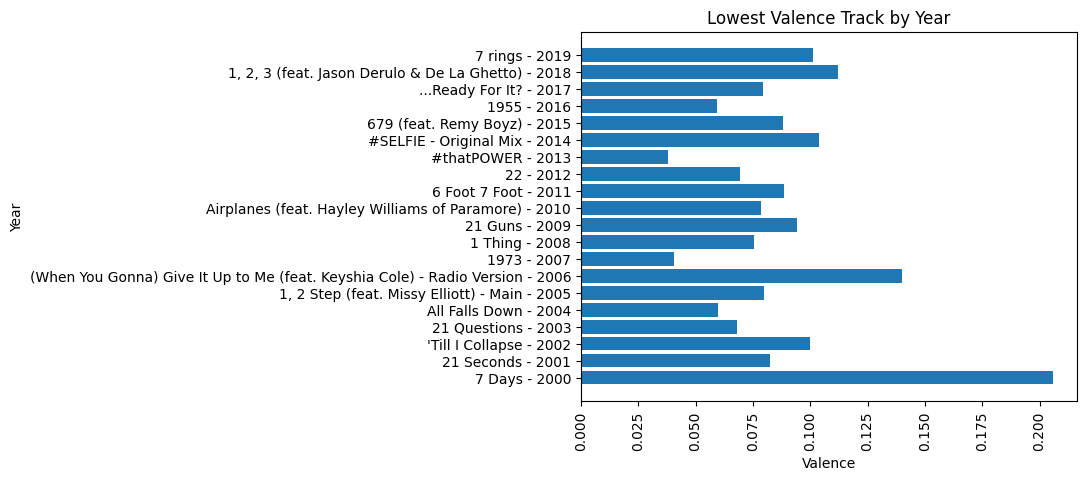

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import csv
song_data = pd.read_csv('songs_normalize.csv')

# What is the lowest Valence track by year

val_by_year = song_data[['song', 'year', 'valence']].groupby('year').min().reset_index()
val_by_year = val_by_year[val_by_year['year'] > 1999]
val_by_year = val_by_year[val_by_year['year'] < 2020]
val_by_year = val_by_year[['song','valence']]
val_by_yearFormatted = val_by_year
yStart = 2000
for y in val_by_year['song']:
    val_by_yearFormatted['song'] = val_by_year['song'].replace(y, (str(y) + ' - ' + str(yStart)))
    yStart+=1

plt.barh(val_by_yearFormatted['song'], val_by_yearFormatted['valence'])
plt.title('Lowest Valence Track by Year')
plt.ylabel('Year')
plt.xlabel('Valence')
plt.xticks(rotation=90)
plt.show()

# Brandon

## What years had the most top songs?

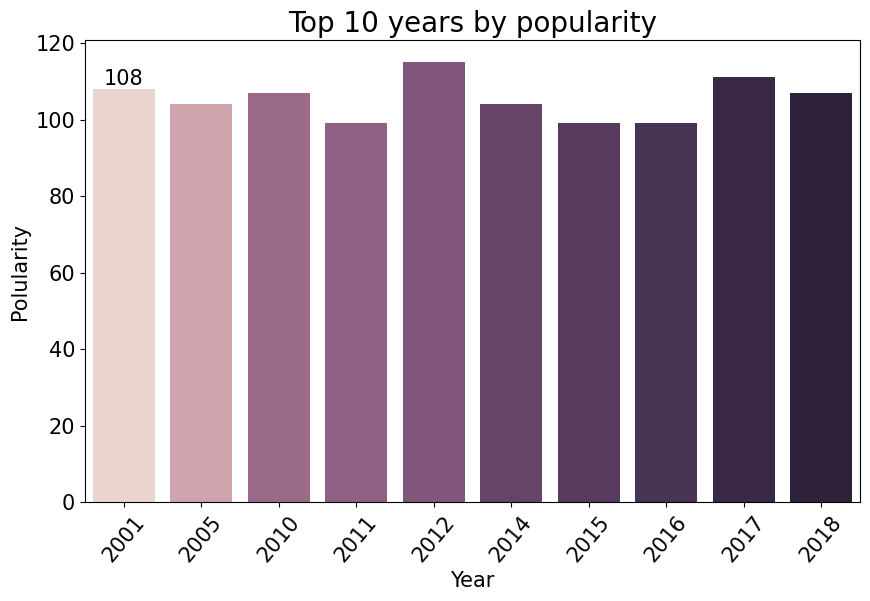

In [ ]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# Read .csv file
df = pd.read_csv('songs_normalize.csv')

# Organize the top 10 years by popularity
top_10_years = (df.year.value_counts().rename_axis('year').reset_index(name = 'popularity')).sort_values(by='popularity', ascending=False).head(10)

# Plotting songs_per_year in a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x = 'year', y = 'popularity', data = top_10_years, hue='year', legend=False)
plt.ylabel('Polularity', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Top 10 years by popularity', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
ax.bar_label(ax.containers[0],size = 15)
plt.show()

## What was the ratio of top songs containing explicit content compared to those that don't?

In [ ]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# Read .csv file
df = pd.read_csv('songs_normalize.csv')

# Creating a dataframe to order songs by explicit and not explicit
explicit_or_not_explicit = pd.DataFrame(df.explicit.value_counts().rename_axis(
    'explicit').reset_index(name='songs'))
explicit_or_not_explicit

# Create a pie chart
fig = px.pie(explicit_or_not_explicit, names = ['Not explicit','Explicit'],
             values = 'songs', template='seaborn',
            title = 'Percentage of explicit content in the top hits from 2000 to 2019')
fig.show()

## What is the average duration of songs in the data set?

In [ ]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# Read .csv file
df = pd.read_csv('songs_normalize.csv')

# Creating a function that converts milliseconds to minutes and seconds
def ms_to_min_sec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"


df['min:sec'] = df['duration_ms'].apply(ms_to_min_sec)

# Organizing a dataframe with the average duration of the top hits from the analyzed period
average_duration = df[['duration_ms','year']].groupby('year').mean().reset_index()
average_duration['min:sec'] =average_duration['duration_ms'].apply(ms_to_min_sec)

# Convert 'duration_ms' to minutes for plotting (numerical representation)
average_duration['duration_min'] = average_duration['duration_ms'] / (1000 * 60)

# Create a scatter plot using 'duration_min' for the y-axis
fig = px.scatter(average_duration, x='year', y='duration_min', trendline='ols',
                 labels = {'duration_min' : 'Average Duration (min)'},
                title = 'Average Duration of Top Hits from 2000-2019')
fig.show()

# Lawrence

## What are the top 5 artists with the most songs?

Top 5 artists with most hit songs 
artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: count, dtype: int64


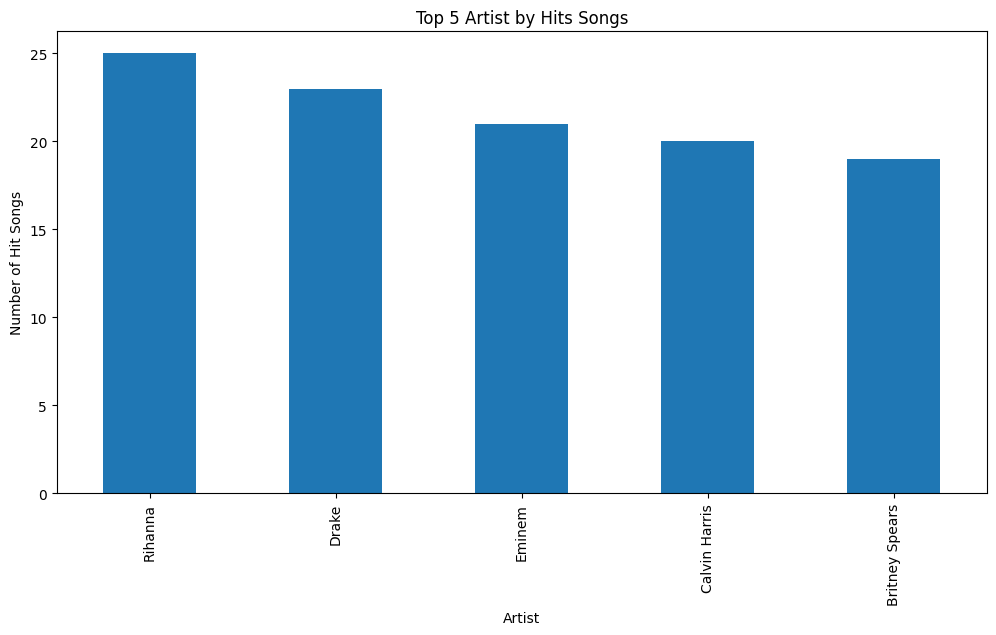

In [ ]:
#Author: lawrence Aryeh

import pandas as pd
import matplotlib.pyplot as plt

songs_data = pd.read_csv('songs_normalize.csv', engine='python')
songs_df = pd.DataFrame(songs_data)
plt.figure(figsize=(12, 6))

#what are top 5 artists with most hit songs
top_5 = songs_df['artist'].value_counts().head(5)
top_5_bar = top_5.plot(kind='bar', xlabel='Artist', ylabel='Number of Hit Songs', title='Top 5 Artist by Hits Songs')
print('Top 5 artists with most hit songs ')
print(top_5)
plt.show()

## What are the proportion of hits per genre in relation to each other?

Hits per genre:
genre
pop                 428
hip hop             124
rock                 58
Dance/Electronic     41
latin                15
R&B                  13
country              10
metal                 9
Name: count, dtype: int64


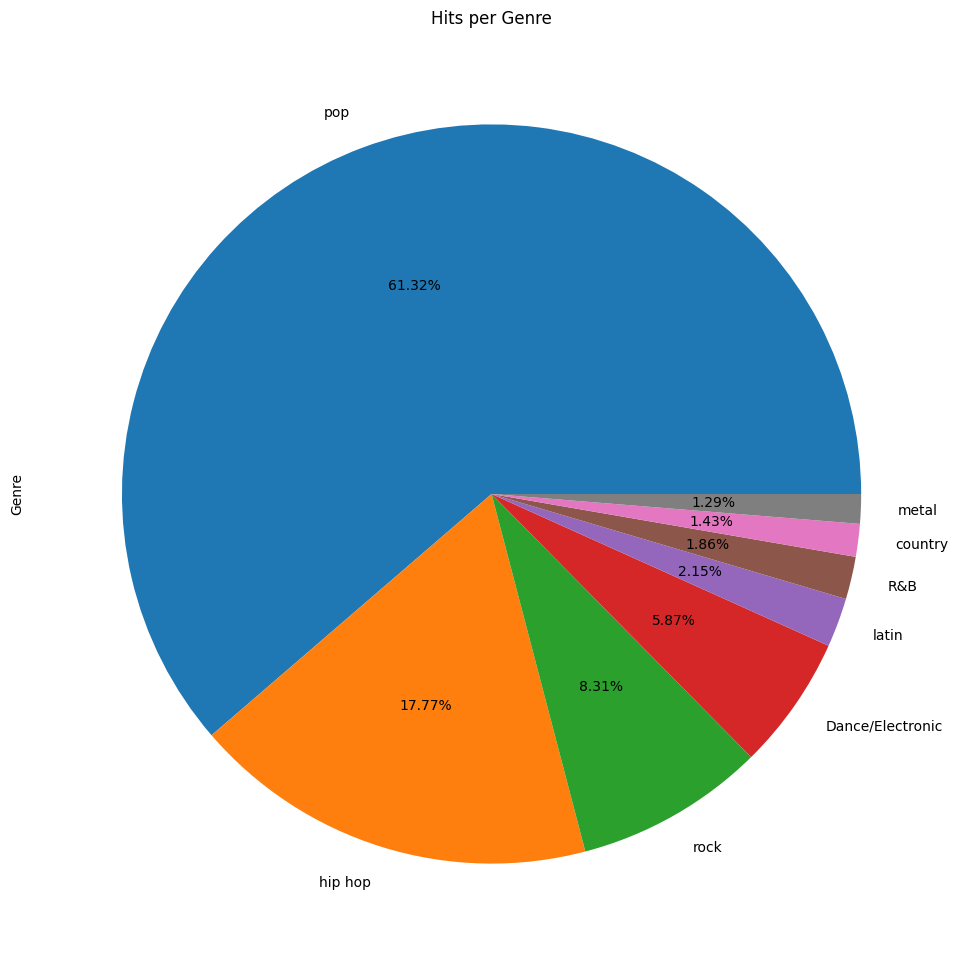

In [ ]:
#Author: lawrence Aryeh

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
#hits songs per genre in relation to each other
genres = ['pop', 'rock', 'country', 'metal', 'hip hop', 'R&B', 'Dance/Electronic', 'Folk/Acoustic', 'latin', 'blues', 'jazz']
filtered_songs_df = songs_df[songs_df['genre'].isin(genres)]

    # Hits songs per genre in relation to each other
hits_per_genre = filtered_songs_df['genre'].value_counts()

    # Plot the hits per genre
hits_per_genre.plot(kind='pie', autopct='%.2f%%', labels=hits_per_genre.index, title='Hits per Genre', ylabel='Genre')
print('Hits per genre:')
print(hits_per_genre)
plt.show()

## What are the proportion of hits per genre in relation to each other in year 2000?

Hits per genre in 2000:
genre
pop                 16
hip hop              4
R&B                  3
metal                2
Dance/Electronic     1
rock                 1
Name: count, dtype: int64


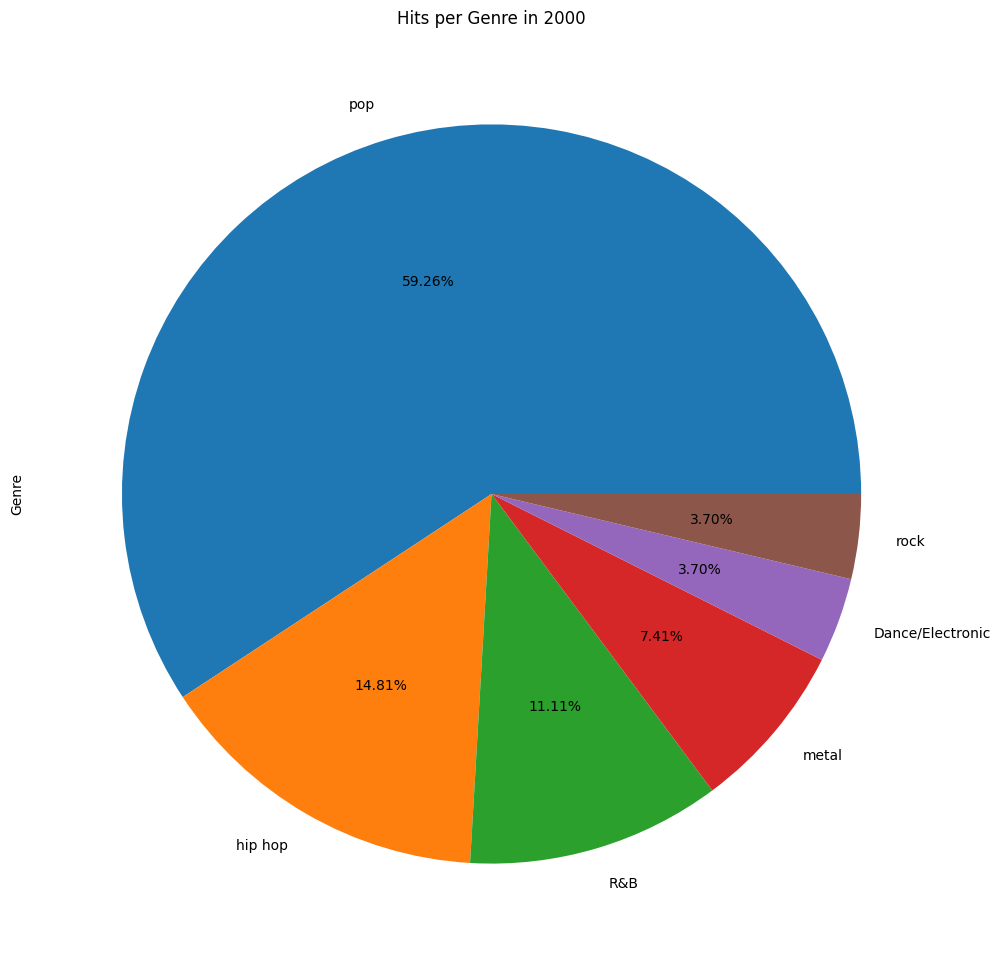

In [ ]:
#Author: lawrence Aryeh

import pandas as pd
import matplotlib.pyplot as plt

#proportion of hits songs per genre in 2000
hits_per_genre_2000 = filtered_songs_df[filtered_songs_df['year'] == 2000]['genre'].value_counts()

    # Plot the proportion of hit songs per genre in 2000
plt.figure(figsize=(12, 12))
hits_per_genre_2000.plot(kind='pie', autopct='%.2f%%', labels=hits_per_genre_2000.index, title='Hits per Genre in 2000', ylabel='Genre')

print('Hits per genre in 2000:')
print(hits_per_genre_2000)
plt.show()